# House Price Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [289]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

In [290]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,3,3,4,0,5,2,2,0,5,6,4,2003,2003,1,0,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,3,3,2,0,24,1,2,0,2,5,7,1976,1976,1,0,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,187,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,0,3,4,0,5,2,2,0,5,6,4,2001,2002,1,0,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,0,3,0,0,6,2,2,0,5,6,4,1915,1970,1,0,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,0,3,2,0,15,2,2,0,5,7,4,2000,2000,1,0,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,118,84,0,0,0,0,0,12,2008,8,4,250000


In [291]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,3,3,4,0,12,1,2,0,2,4,5,1961,1961,1,0,11,13,2,0.0,3,4,1,4,4,3,5,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,3,1,1961.0,3,1.0,730.0,4,5,2,75,0,0,0,120,0,0,6,2010,9,4
1,1462,20,4,81.0,14267,0,3,0,0,12,2,2,0,2,5,5,1958,1958,3,0,12,14,1,108.0,3,4,1,4,4,3,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,7,0,3,1,1958.0,3,1.0,312.0,4,5,2,225,36,0,0,0,0,12500,6,2010,9,4
2,1463,60,4,74.0,13830,0,3,4,0,8,2,2,0,4,4,4,1997,1998,1,0,11,13,2,0.0,3,4,2,2,4,3,2,791.0,6,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,5,1,1997.0,0,2.0,482.0,4,5,2,134,34,0,0,0,0,0,3,2010,9,4
3,1464,60,4,78.0,9978,0,3,4,0,8,2,2,0,4,5,5,1998,1998,1,0,11,13,1,20.0,3,4,2,4,4,3,2,602.0,6,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,7,1,2,1,1998.0,0,2.0,470.0,4,5,2,219,36,0,0,0,0,0,6,2010,9,4
4,1465,120,4,43.0,5005,0,1,4,0,22,2,2,4,2,7,4,1992,1992,1,0,6,6,2,0.0,2,4,2,2,4,3,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,7,0,3,1,1992.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,0,1,2010,9,4


## Splitting Train and Test Data

In [292]:
y_train = df_train['SalePrice']
df_train = df_train.drop('SalePrice', axis = 1)
X_test = df_test.set_index('Id')

In [293]:
from sklearn.model_selection import train_test_split

In [294]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_train, y_train, test_size = 0.3, random_state = 0)

In [309]:
x_train1.shape

(1019, 73)

In [295]:
y_train1.shape

(1019,)

In [296]:
y_test1.shape

(438,)

## Scaling Data

In [297]:
from sklearn.preprocessing import StandardScaler

In [320]:
SCALE = StandardScaler()
x_train_scale = SCALE.fit_transform(x_train1)
x_test_scale = SCALE.transform(x_test1)

## Dimensionality Reduction

In [299]:
from sklearn.decomposition import PCA

In [321]:
pca = PCA(n_components = 10)
X_train1 = pca.fit_transform(x_train_scale)
X_test1 = pca.transform(x_test_scale)

## Model Selection

### Linear Regression Model

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [322]:
lm = LinearRegression()
lm.fit(X_train1, y_train1)

LinearRegression()

In [323]:
lm.intercept_

180736.68204121687

In [324]:
lm.coef_

array([21291.43560511,  4258.51554611,  9644.9836567 , -3622.16202051,
        2386.76038545,  4432.6959899 ,  2404.97836291, -8012.8548765 ,
        2489.056721  , -3286.07102914])

In [325]:
lm.score(X_test1, y_test1)

0.862963206756608

#### Polynomial Regression Check

In [330]:
R2_test = []
order = [i for i in range(1,4)]

In [331]:
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(X_train1)
    x_test_pr = pr.transform(X_test1)
    lm.fit(x_train_pr, y_train1)
    R2_test.append(lm.score(x_test_pr, y_test1))

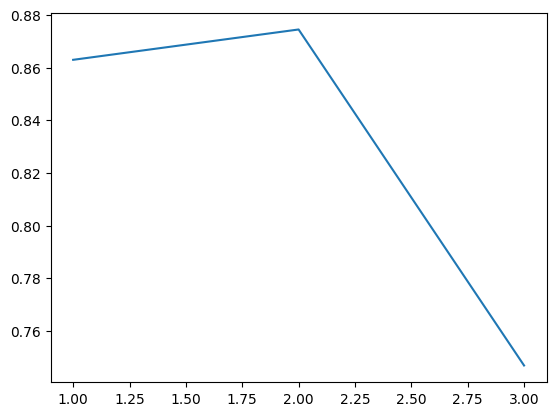

In [332]:
sns.lineplot(x = order, y = R2_test)
plt.show()

In [333]:
R2_test

[0.862963206756608, 0.8744908344943653, 0.7468412082843714]

**Polynomial Regression Value of 2 gives highest r-squared value.**

In [334]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(X_train1)
x_test_pr = pr.transform(X_test1)

In [335]:
lm.fit(x_train_pr, y_train1)

LinearRegression()

In [336]:
lm.score(x_test_pr, y_test1)

0.8744908344943653

#### Ridge Regression

In [157]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [172]:
params = {'alpha' : [0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [173]:
RR = Ridge()

In [174]:
grid_search = GridSearchCV(estimator=RR, param_grid=params, cv=4)

In [183]:
grid_search.fit(x_train_pr, y_train1)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]})

In [184]:
grid_search.best_estimator_

Ridge(alpha=100)

In [185]:
scores = grid_search.cv_results_
scores['mean_test_score']

array([0.77317691, 0.77317694, 0.77317726, 0.77318045, 0.77321215,
       0.77351419, 0.77541434, 0.76498752, 0.62625273])

**Ridge Regression reduces the R-squared so we will not use it for our model.**

### RandomForest Regression

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [337]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(X_train1, y_train1)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [338]:
rf.score(X_test1, y_test1)

0.8813996577311652

**Score of RandomForest Regression Model > Score of Linear Regression Model. <br>
Hence, we will use the RandomForst Regression Model.**

### Splitting Final Dataset

In [339]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,3,3,4,0,5,2,2,0,5,6,4,2003,2003,1,0,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,2,2008,8,4
2,20,3,80.0,9600,3,3,2,0,24,1,2,0,2,5,7,1976,1976,1,0,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,187,0,0,0,0,0,0,5,2007,8,4
3,60,3,68.0,11250,0,3,4,0,5,2,2,0,5,6,4,2001,2002,1,0,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,9,2008,8,4
4,70,3,60.0,9550,0,3,0,0,6,2,2,0,5,6,4,1915,1970,1,0,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,2,2006,8,0
5,60,3,84.0,14260,0,3,2,0,15,2,2,0,5,7,4,2000,2000,1,0,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,118,84,0,0,0,0,0,12,2008,8,4


In [342]:
X_train.shape

(1457, 73)

In [341]:
y_train.shape

(1457,)

In [344]:
X_test.shape

(1459, 73)

### Scaling Final Dataset

In [345]:
SCALE = StandardScaler()
x_train_scale = SCALE.fit_transform(X_train)
x_test_scale = SCALE.transform(X_test)

### Dimensionality Reduction

In [346]:
pca = PCA(n_components = 10)
X_train1 = pca.fit_transform(x_train_scale)
X_test1 = pca.transform(x_test_scale)

### Final Prediction Model Values

In [347]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(X_train1, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [348]:
y_predict = rf.predict(X_test1)

In [351]:
submission = {'Id' : ids, 'SalePrice' : y_predict}
sub = pd.DataFrame.from_dict(submission)

In [352]:
sub.to_csv('submission.csv', index = False)

In [353]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(X_train1)
x_test_pr = pr.transform(X_test1)

In [354]:
lm.fit(x_train_pr, y_train)

LinearRegression()

In [355]:
y_predict2 = lm.predict(x_test_pr)

In [356]:
submission2 = {'Id' : ids, 'SalePrice' : y_predict2}
sub2 = pd.DataFrame.from_dict(submission2)

In [357]:
sub2.to_csv('submission2.csv', index = False)